   ID                                           TextData
0   1  Happy anniversary! ❤ Next stop: Paris! ✈ #vaca...
1   2  Haha, BBQ on the beach, engage smug mode! 😍 😎 ...
2   3  getting ready for Saturday night 🍕 #yum #weeke...
3   4           Say it with me - I NEED A #VACATION!!! ☹
4   5  😎 Chilling 😎 at home for the first time in age...
0    Happy anniversary! ❤ Next stop: Paris! ✈ #vaca...
1    Haha, BBQ on the beach, engage smug mode! 😍 😎 ...
2    getting ready for Saturday night 🍕 #yum #weeke...
3             Say it with me - I NEED A #VACATION!!! ☹
4    😎 Chilling 😎 at home for the first time in age...
Name: TextData, dtype: object


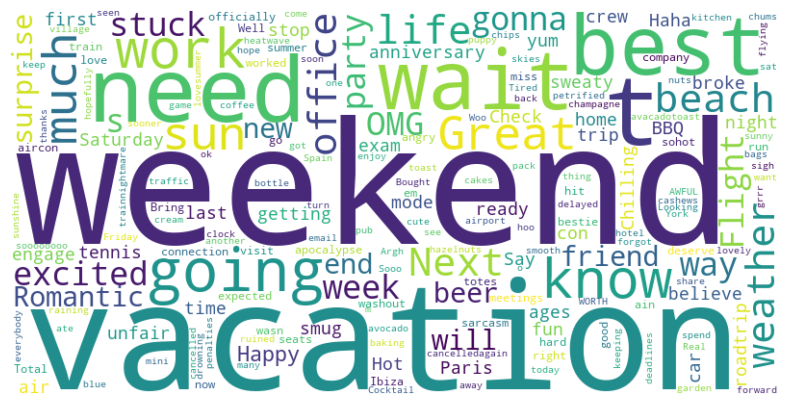

1     Haha, BBQ on the beach, engage smug mode! 😍 😎 ...
2     getting ready for Saturday night 🍕 #yum #weeke...
4     😎 Chilling 😎 at home for the first time in age...
10    🎉 Check the out-of-office crew, we are officia...
13    Who needs a #vacation when the weather is this...
Name: TextData, dtype: object


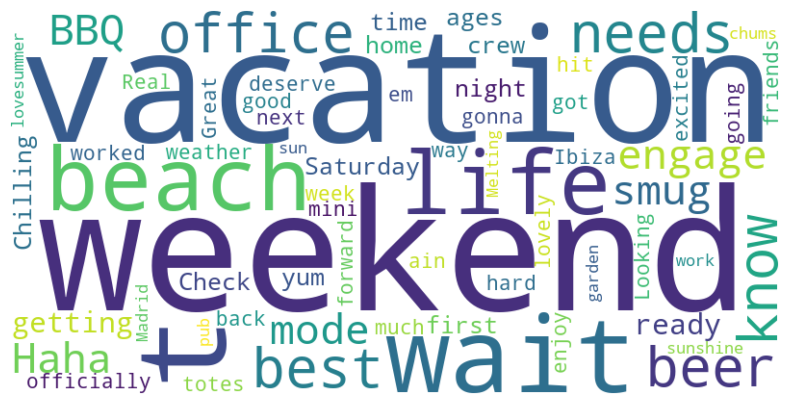

[['Happy', 'anniversary', '!', '❤', 'Next', 'stop', ':', 'Paris', '!', '✈', '#', 'vacation'], ['Haha', ',', 'BBQ', 'on', 'the', 'beach', ',', 'engage', 'smug', 'mode', '!', '😍', '😎', '❤', '🎉', '#', 'vacation'], ['getting', 'ready', 'for', 'Saturday', 'night', '🍕', '#', 'yum', '#', 'weekend', '😎'], ['Say', 'it', 'with', 'me', '-', 'I', 'NEED', 'A', '#', 'VACATION', '!', '!', '!', '☹'], ['😎', 'Chilling', '😎', 'at', 'home', 'for', 'the', 'first', 'time', 'in', 'ages…This', 'is', 'the', 'life', '!', '👍', '#', 'weekend']]
           Token   Type
0          Happy   word
1    anniversary   word
2              !   word
3              ❤  emoji
4           Next   word
..           ...    ...
761          out   word
762            ?   word
763            😎  emoji
764            #   word
765      weekend   word

[766 rows x 2 columns]


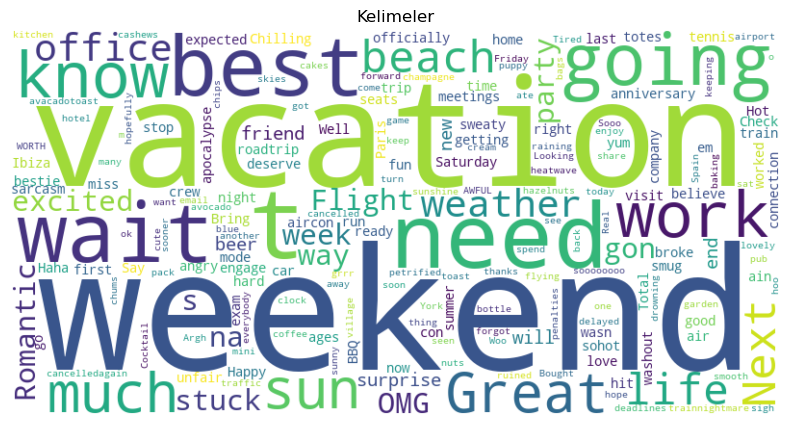

3      ❤
9      ✈
23     😍
24     😎
25     ❤
      ..
734    😢
736    ’
744    😎
751    ☀
763    😎
Name: Token, Length: 126, dtype: object


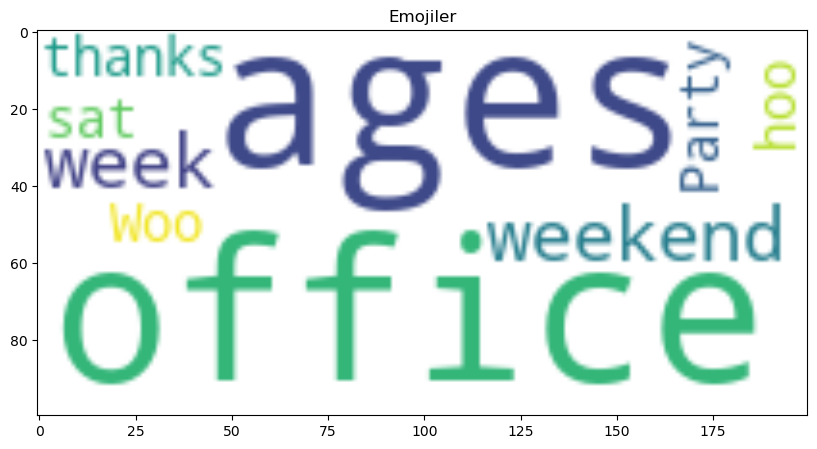

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string


# Excel dosyasını oku
filename = "weekendUpdates.xlsx"
tbl = pd.read_excel(filename, dtype={'TextData': str})
print(tbl.head())

# Metin verilerini al
textData = tbl['TextData']
print(textData.head())

# Tüm metin verisi için Wordcloud oluştur
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(' '.join(textData))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.show()

# 😎 emoji'sini seç
emoji = "😎"
textDataSunglasses = textData[textData.str.contains(emoji)]
print(textDataSunglasses.head())

# 😎 emoji'si için Wordcloud oluştur
wordcloud_sunglasses = WordCloud(width=800, height=400, background_color='white').generate(' '.join(textDataSunglasses))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sunglasses, interpolation='bilinear')
plt.axis('off')
plt.show()

# Metin verilerini tokenize et
documents = [word_tokenize(doc) for doc in textData]
print(documents[:5])

# Token Detayları
tdetails = pd.DataFrame({'Token': [token for doc in documents for token in doc],
                         'Type': ['word' if token.isalnum() or token in string.punctuation else 'emoji' for doc in documents for token in doc]})
print(tdetails)

# Tüm token'lar için Wordcloud oluştur
wordcloud_tokens = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tdetails['Token']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tokens, interpolation='bilinear')
plt.axis('off')
plt.title("Kelimeler")
plt.show()

# Emoji'ler için Wordcloud oluştur
emoji_tokens = tdetails[tdetails['Type'] == 'emoji']['Token']

emoji_tokens = emoji_tokens.astype(str)
print(emoji_tokens)


# Emoji' varsa Wordcloud oluştur, yoksa mesaj yazdır
if not emoji_tokens.empty:
    wordcloud_emojis = WordCloud(width=200, height=100, background_color='white',collocations=False).generate(' '.join(emoji_tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_emojis, interpolation='bilinear')
    plt.title("Emojiler")
    plt.show()
else:
    print("Emoji bulunamadı.")


  ID                                           TextData
0  1  Happy anniversary! ❤ Next stop: Paris! ✈ #vaca...
1  2  Haha, BBQ on the beach, engage smug mode! 😍 😎 ...
2  3  getting ready for Saturday night 🍕 #yum #weeke...
3  4           Say it with me - I NEED A #VACATION!!! ☹
4  5  😎 Chilling 😎 at home for the first time in age...


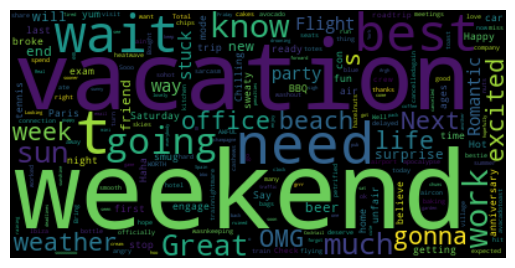

[['Happy', 'anniversary', '!', '❤', 'Next', 'stop', ':', 'Paris', '!', '✈', '#', 'vacation'], ['Haha', ',', 'BBQ', 'on', 'the', 'beach', ',', 'engage', 'smug', 'mode', '!', '😍', '😎', '❤', '🎉', '#', 'vacation'], ['getting', 'ready', 'for', 'Saturday', 'night', '🍕', '#', 'yum', '#', 'weekend', '😎'], ['Say', 'it', 'with', 'me', '-', 'I', 'NEED', 'A', '#', 'VACATION', '!', '!', '!', '☹'], ['😎', 'Chilling', '😎', 'at', 'home', 'for', 'the', 'first', 'time', 'in', 'ages…This', 'is', 'the', 'life', '!', '👍', '#', 'weekend']]
         Token
0        Happy
1  anniversary
2            !
3            ❤
4         Next


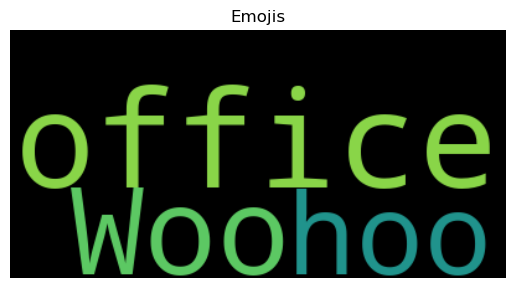

In [23]:
import pandas as pd
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# MATLAB'dan farklı olarak, pandas kütüphanesi kullanılarak Excel dosyası okunuyor.
filename = "weekendUpdates.xlsx"
tbl = pd.read_excel(filename, dtype=str)
print(tbl.head())

# wordcloud kütüphanesi kullanılarak kelime bulutu oluşturuluyor.
text_data = " ".join(tbl['TextData'])  # 'your_column_name' gerçek sütun adıyla değiştirilmelidir.
wordcloud = WordCloud().generate(text_data)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# nltk kütüphanesi kullanılarak belgeleri tokenize etme işlemi yapılıyor.
documents = [word_tokenize(text) for text in tbl['TextData']]

# İlk 5 belgeyi yazdırma
print(documents[:5])

# nltk kütüphanesi kullanılarak belgelerin token detayları alınıyor.
tdetails = pd.DataFrame({'Token': [token for doc in documents for token in doc]})
print(tdetails.head())

# Token detaylarından sadece emoji'leri seçme işlemi yapılıyor.
idx = tdetails['Token'].apply(lambda x: x.isascii() and not x.isalnum())
tokens = tdetails.loc[idx, 'Token']

# wordcloud kütüphanesi kullanılarak emoji'lerin kelime bulutu oluşturuluyor.
wordcloud = WordCloud().generate(" ".join(tokens))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Emojis")
plt.axis("off")
plt.show()
